In [1]:
import numpy as np

def solve_first(x, y):
    T0 = np.dot(x**0, y)
    T1 = np.dot(x, y)
    T2 = np.dot(x**2, y)

    S0 = np.sum(x**0)
    S1 = np.sum(x**1)
    S2 = np.sum(x**2)
    S3 = np.sum(x**3)
    S4 = np.sum(x**4)


    S = np.array([
        [S0, S1, S2],
        [S1, S2, S3],
        [S2, S3, S4]
    ])

    T = np.array([T0, T1, T2])

    return np.linalg.solve(S, T)


def solve_second(x, y):
    T1 = np.dot(x, y)
    T2 = np.dot(x**2, y)
    T3 = np.dot(x**3, y)

    S2 = np.sum(x**2)
    S3 = np.sum(x**3)

    T = np.array([[T2, T1], [T3, T2]])
    S = np.array([S2, S3])

    return np.linalg.solve(T, S)


def create_func(a, b):
    return lambda x : x / (a*x + b)

def get_sigma(x, y, f):
    ans = 0
    for i in range(len(x)):
        ans += (y[i] - f(x[i]))**2
    # ans /= len(x)
    return np.round(ans, 2)



In [2]:
left = 7
right = 10
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 10, 14])[left: right]
y = np.array([0, 0.5, 0.7, 0.8, 0.85, 0.875, 0.88, 0.881, 0.886, 0.991])[left: right]


# y, x
a, b = solve_second(x, y)

func = create_func(a, b)

get_sigma(x, y, func)

0.0

In [9]:
d_a, d_b = solve_second(x, y)
d_a, d_b

(0.8075942744895486, 2.889257612237435)

In [4]:
x, y

(array([ 8, 10, 14]), array([0.881, 0.886, 0.991]))

In [10]:
s_a, s_b, s_c = solve_first(x, y)
s_a, s_b, s_c

(1.1776666666667834, -0.06875000000002215, 0.0039583333333343285)

In [6]:
def drob_rac_func(x, a, b):
    return x / (x*a + b)

def square_func(x, a, b, c):
    return c*x**2 + b*x + a

def create_drob_rac_func(a, b):
    return lambda x : drob_rac_func(x, a, b)

def create_square_func(a, b, c):
    return lambda x : square_func(x, a, b, c)

In [7]:
import matplotlib.pyplot as plt

def draw_func(x_arr, func):
    y = [func(i) for i in x_arr]
    plt.plot(x_arr, y)


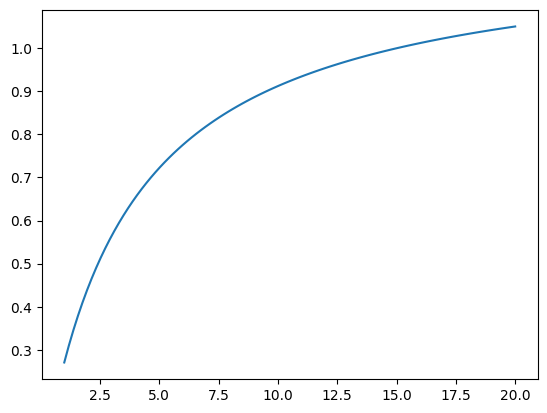

In [14]:
f_d = create_drob_rac_func(d_a, d_b)
x = np.linspace(1, 20, 100)

draw_func(x, f_d)

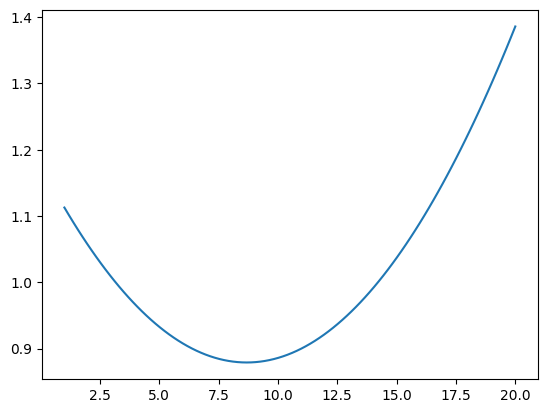

In [15]:
f_s = create_square_func(s_a, s_b, s_c)
x = np.linspace(1, 20, 100)

draw_func(x, f_s)